In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten,MaxPooling2D

In [4]:
base_dir= '/kaggle/input/utkface-new/UTKFace/'

In [5]:
image_paths=[]
age_labels=[]

for filename in tqdm(os.listdir(base_dir)):
    image_path=os.path.join(base_dir, filename)
    temp=filename.split('_')
    age= int(temp[0])
    image_paths.append(image_path)
    age_labels.append(age)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [6]:
df= pd.DataFrame()
df['image'], df['age'] = image_paths, age_labels
df.tail()

,image,age
23703,/kaggle/input/utkface-new/UTKFace/41_0_0_20170...,41
23704,/kaggle/input/utkface-new/UTKFace/42_0_0_20170...,42
23705,/kaggle/input/utkface-new/UTKFace/2_0_2_201612...,2
23706,/kaggle/input/utkface-new/UTKFace/65_1_0_20170...,65
23707,/kaggle/input/utkface-new/UTKFace/66_0_1_20170...,66


<Axes: xlabel='age', ylabel='Density'>

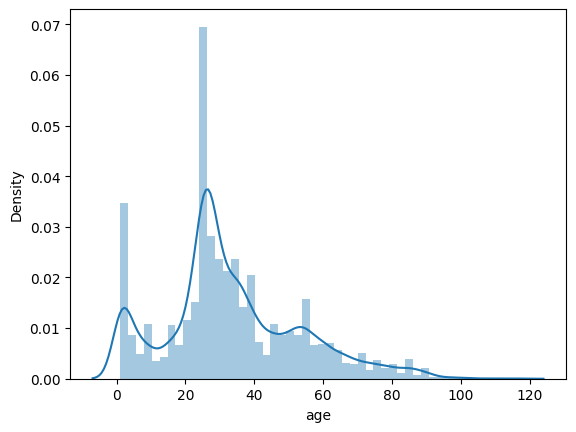

In [7]:
sns.distplot(df['age'])

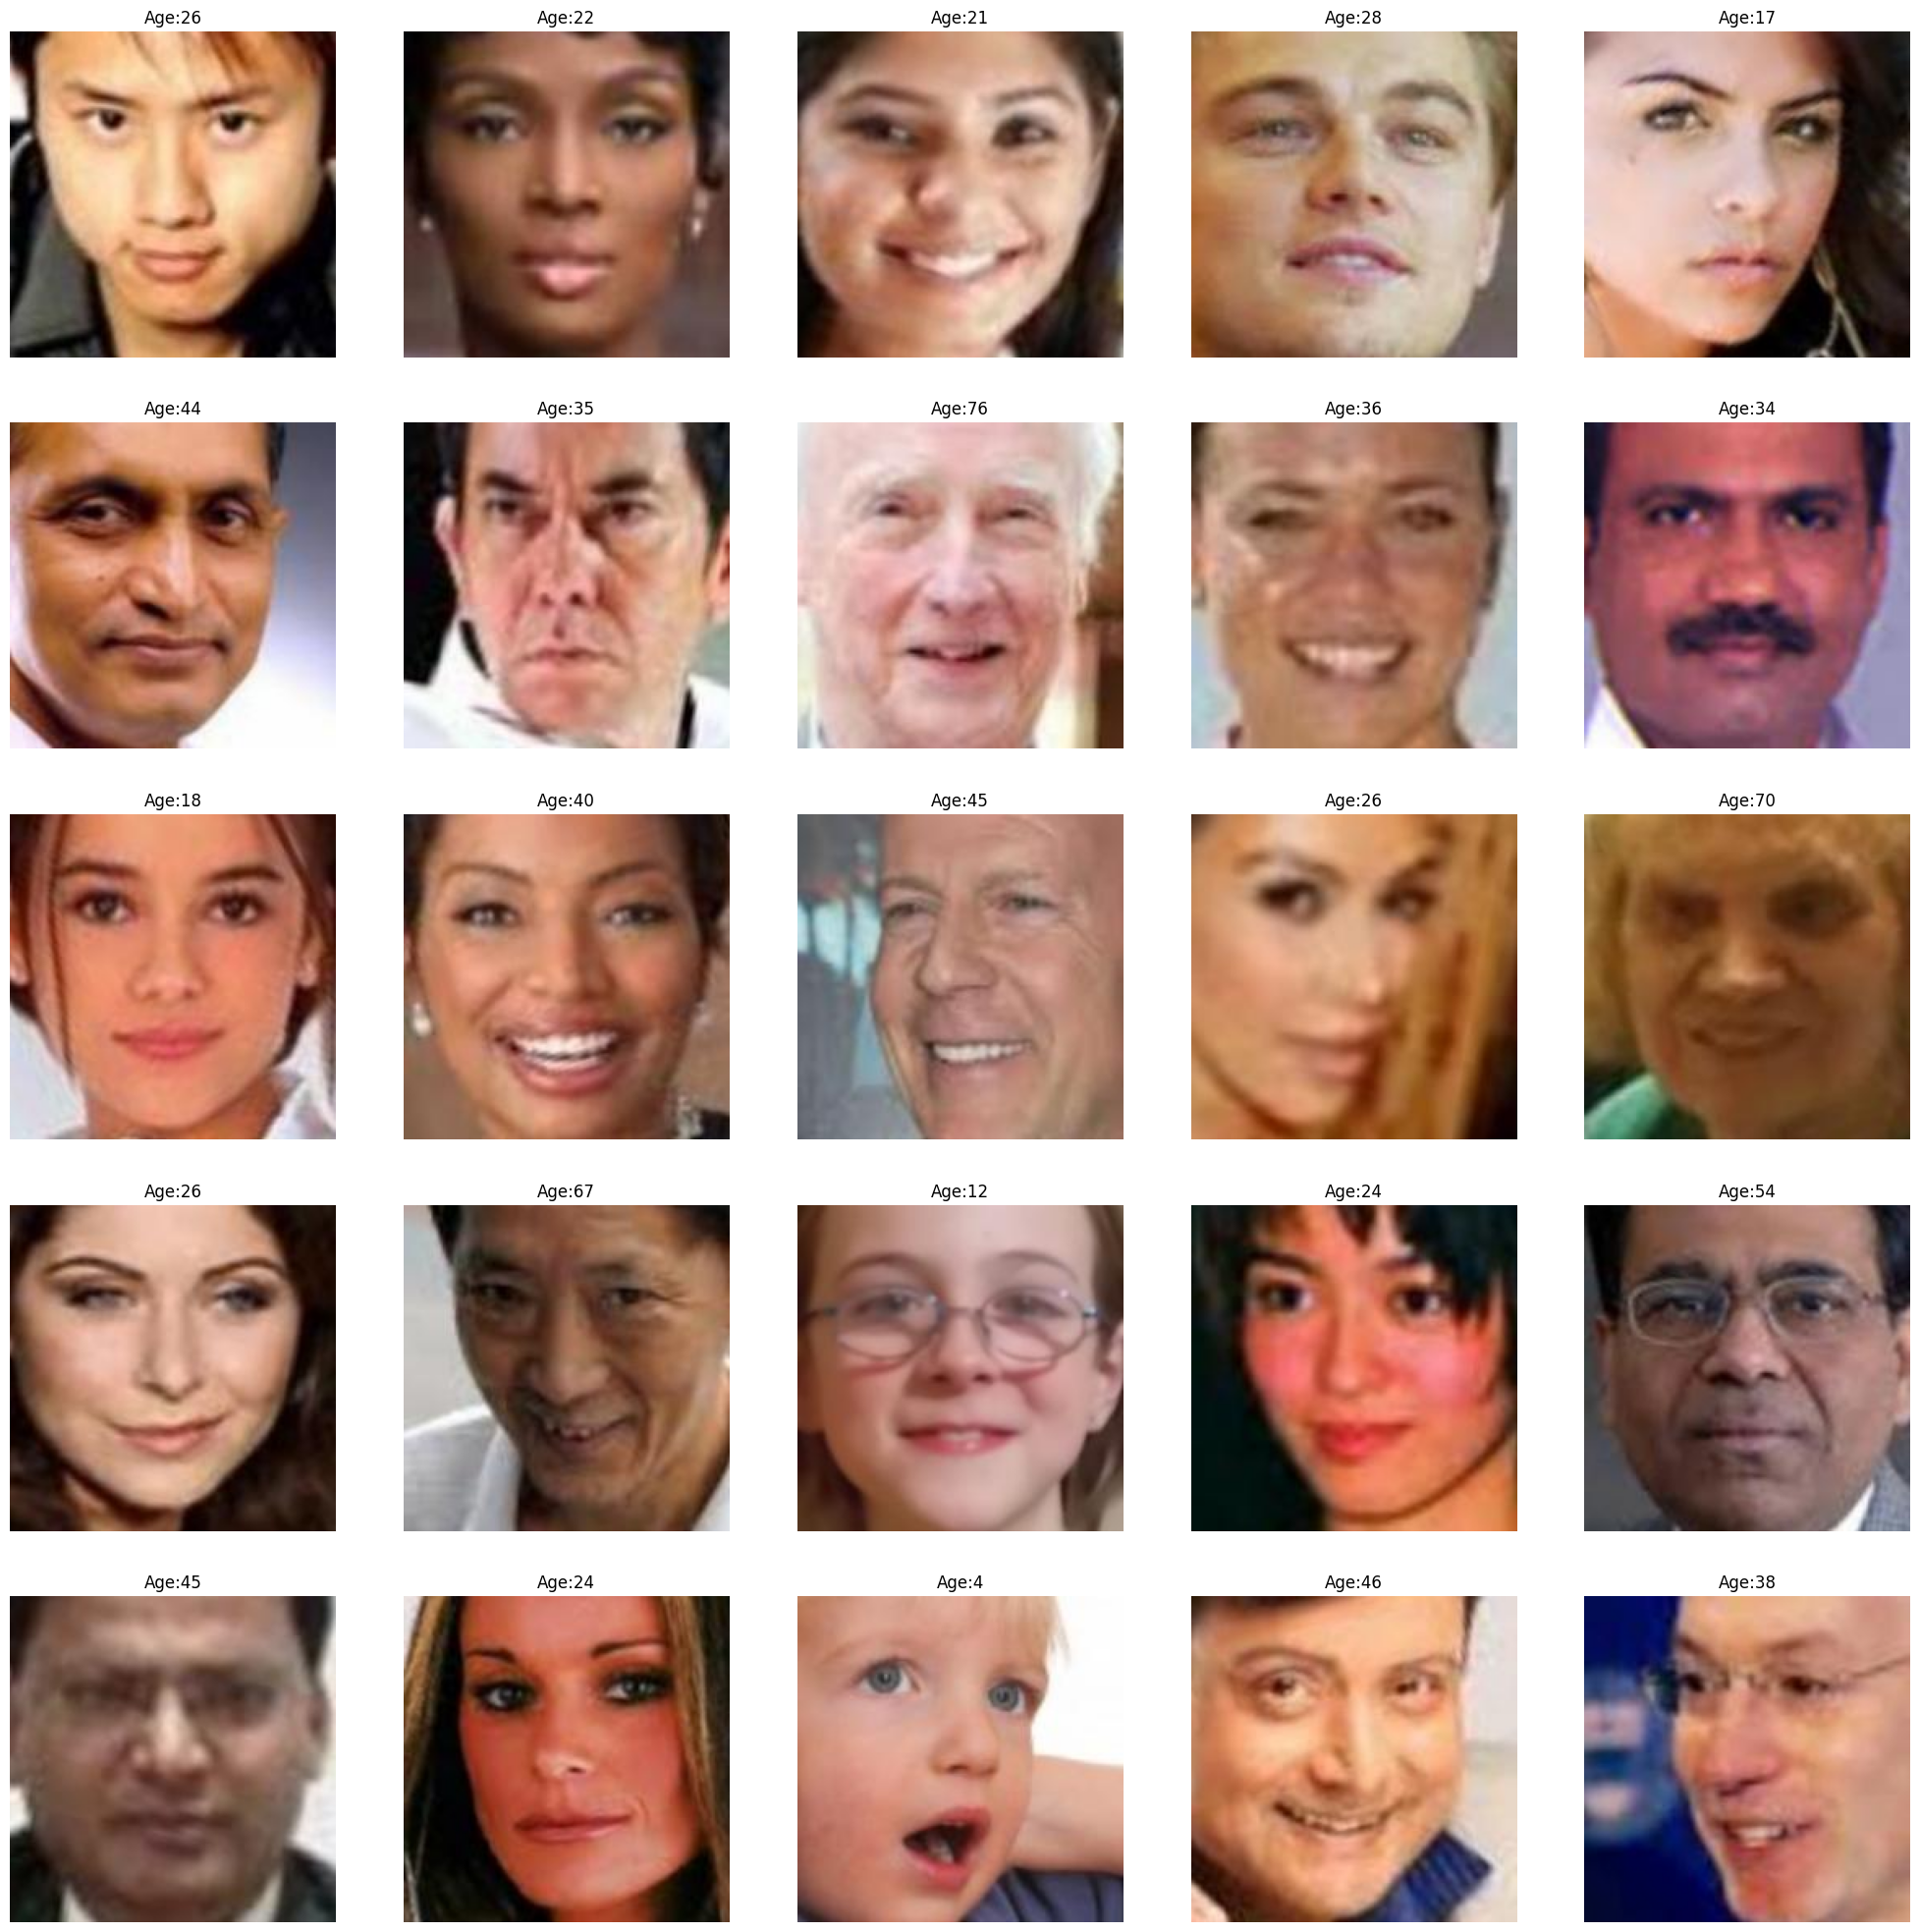

In [8]:
plt.figure(figsize=(25, 25))
files = df.iloc[0:25]

for index, file, age in files.itertuples():
    plt.subplot(5, 5, index+1)
    img= load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age:{age}")
    plt.axis('off')

In [9]:
from PIL import Image
import numpy as np
from tqdm import tqdm  

def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')  
        img = img.resize((128, 128), Image.LANCZOS)  
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [11]:
X = extract_features(df['image'])

100%|██████████| 23708/23708 [02:49<00:00, 139.89it/s]


In [12]:
X.shape

(23708, 128, 128, 1)

In [13]:
X = X/255.0

In [14]:
y_age = np.array(df['age'])

In [15]:
input_shape = (128,128,1)

In [21]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
inputs = Input((input_shape))
conv_1 = Conv2D(32, kernel_size=(3,3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2,2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3,3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2,2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3,3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2,2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3,3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2,2)) (conv_4)

flatten = Flatten() (maxp_4)

dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

# dropout_1= Dropout(0,3) (dense_1)
dropout_2= Dropout(0,3) (dense_1)

output_1= Dense(1, activation='relu',name='age_out') (dropout_2)

model= Model(inputs=[inputs], outputs=[output_1])

model.compile(loss=['mae'], optimizer='adam', metrics=['accuracy'])

In [22]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ age_out (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,747,649 (10.48 MB)

 Trainable params: 2,747,649 (10.48 MB)

 Non-trainable params: 0 (0.00 B)

# **TRAINING THE MODEL**

In [23]:
history= model.fit(x=X,y=[y_age],batch_size=32,epochs=30,validation_split=0.2)

Epoch 1/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 324s 543ms/step - accuracy: 0.0186 - loss: 25.9174 - val_accuracy: 0.0460 - val_loss: 12.8903
Epoch 2/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 373s 529ms/step - accuracy: 0.0339 - loss: 11.7578 - val_accuracy: 0.0335 - val_loss: 12.1522
Epoch 3/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 319s 538ms/step - accuracy: 0.0178 - loss: 9.7800 - val_accuracy: 0.0215 - val_loss: 9.1009
Epoch 4/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 320s 534ms/step - accuracy: 0.0103 - loss: 8.4952 - val_accuracy: 0.0110 - val_loss: 9.6829
Epoch 5/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 319s 530ms/step - accuracy: 0.0105 - loss: 7.8293 - val_accuracy: 0.0101 - val_loss: 7.4837
Epoch 6/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 314s 529ms/step - accuracy: 0.0072 - loss: 7.0329 - val_accuracy: 0.0070 - val_loss: 7.1505
Epoch 7/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 324s 532ms/step - accuracy: 0.0064 - loss: 6.6430 - val_accuracy: 0.0097 - val_loss: 7.2190
Epoch 8/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 318s 526ms/step - accuracy: 0.00

<function matplotlib.pyplot.show(close=None, block=None)>

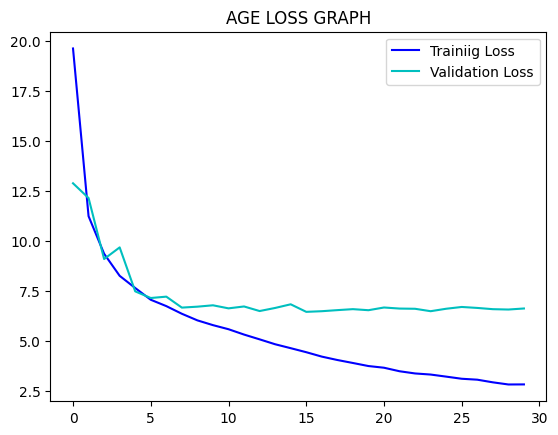

In [26]:
Loss=history.history["loss"]
Val_loss=history.history["val_loss"]
epochs=range(len(Loss))

plt.plot(epochs,Loss,'b',label="Trainiig Loss")
plt.plot(epochs,Val_loss,'c',label="Validation Loss")
plt.title("AGE LOSS GRAPH")
plt.legend()
plt.show

# **PREDICTION WITH MODEL**

original age: 18
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
predicted age: 18


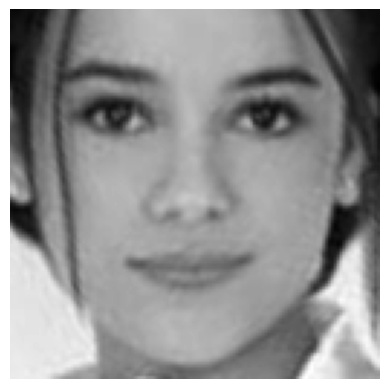

In [42]:
image_index = 10
print("original age:",y_age[image_index])
pred=model.predict(X[image_index].reshape(1,128,128,1))
pred_age=round(pred[0][0])
print("predicted age:",pred_age)
plt.axis("off")
plt.imshow(X[image_index].reshape(128,128),cmap='gray');